#<b>NLP information retrieval, topic modelling and summarisation tool</b>


##<b> Prework</b>


###<b>Uploading the Datasets</b>

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
# shows the file path of the location of the datasets used for this project
data_path = "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"
!ls "/content/drive/My Drive/Colab Notebooks/COP509cw/Datasets/"

data_all_reviews = "JewelleryReviewsLSA.csv"
data_all_queries = "JewelleryReviewsQueryRelevantID.csv"

JewelleryReviewsLSA.csv     JewelleryReviewsQueryRelevantID.csv
JewelleryReviewsLSA.gsheet  JewelleryReviewsSummarisationTargets.csv


##<b> 1:Data Pre-processing</b>

###<b>Cleaning and Tokenisation of Data</b>

Extracts all the words from the csv file and returns them as a list of indvidual words (tokens). Afterwards, the tokens are cleaned by removing words that are infrequent in all documents, punctuations and stop words.

In [3]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
import nltk

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

# load document collections (docs) into memory
def load_docs(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

# turn a document collections into clean tokens
def clean_docs(docs):
	# split into tokens by white space
	tokens = docs.split()
	# convert to lower case
	tokens = [word.lower() for word in tokens]
	# remove punctuation from each token
	table = str.maketrans('', '', punctuation)
	tokens = [w.translate(table) for w in tokens]
	# remove remaining tokens that are not alphabetic
	tokens = [word for word in tokens if word.isalpha()]
	# filter out stop words
	stop_words = set(stopwords.words('english'))
	tokens = [w for w in tokens if not w in stop_words]
	# filter out short tokens
	tokens = [word for word in tokens if len(word) > 1]
	# lemmatize the tokens
	# This pre-processing technique was inspired by the link below
  # https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
	tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
	return tokens

# load the document collection
filename = data_path + data_all_reviews
text = load_docs(filename)
tokens = clean_docs(text)
print(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['idreviewsratings', 'expect', 'like', 'regular', 'size', 'ringbut', 'one', 'look', 'like', 'ring', 'toy', 'something', 'funy', 'mm', 'ring', 'ring', 'may', 'cttw', 'round', 'diamond', 'solitaire', 'ring', 'white', 'ordered', 'ring', 'stated', 'toe', 'ring', 'description', 'ring', 'came', 'quickly', 'toe', 'ring', 'dont', 'know', 'anyone', 'size', 'toe', 'know', 'anyone', 'please', 'direct', 'seller', 'wedding', 'band', 'toe', 'ring', 'thumb', 'ring', 'pick', 'ring', 'beautiful', 'ring', 'first', 'shipment', 'ring', 'scratch', 'diamond', 'missing', 'diamond', 'shoulder', 'ring', 'returned', 'ring', 'replacement', 'ring', 'second', 'ring', 'even', 'worse', 'clearly', 'visible', 'white', 'scratch', 'right', 'middle', 'black', 'diamond', 'look', 'great', 'time', 'diamond', 'missing', 'shoulder', 'ring', 'returned', 'refund', 'thanks', 'alot', 'ring', 'beautiful', 'ring', 'first', 'shipment', 'ring', 'scratch', 'diamond', 'missing', 'diamond', 'shoulder', 'ring', 'returned', 'ring', 'repla

###<b>Creating a Vocabulary</b>

All of the words and their respective word counts are passed into a vocabulary list from the tokens in the reviews pass.

In [4]:
from collections import Counter

# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
	# load doc
	doc = load_docs(filename)
	# clean doc
	tokens = clean_docs(doc)
	# update counts
	vocab.update(tokens)

# define vocab
vocab = Counter()
# add all docs to vocab
add_doc_to_vocab(filename,vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

1008
[('ring', 363), ('look', 71), ('like', 58), ('wear', 46), ('love', 40), ('picture', 40), ('one', 38), ('quality', 36), ('would', 33), ('beautiful', 31), ('diamond', 30), ('item', 28), ('great', 24), ('stone', 23), ('nice', 21), ('color', 20), ('bought', 19), ('time', 18), ('silver', 18), ('small', 18), ('pretty', 18), ('got', 17), ('price', 17), ('gift', 17), ('size', 16), ('dont', 15), ('fit', 15), ('received', 15), ('blue', 15), ('buy', 15), ('perfect', 15), ('bracelet', 15), ('first', 14), ('even', 14), ('recommend', 14), ('little', 14), ('looking', 14), ('wearing', 13), ('product', 13), ('much', 12), ('really', 12), ('also', 12), ('wedding', 11), ('definitely', 11), ('order', 11), ('looked', 11), ('seller', 10), ('returned', 10), ('right', 10), ('purchased', 10)]


Remove any words that is not written more than 2 times

In [5]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

451


Saves the vocabulary list into a file 

In [6]:
# save list to file
def save_list(lines, filename):
	# convert lines to a single blob of text
	data = '\n'.join(lines)
	# open file
	file = open(filename, 'w')
	# write text
	file.write(data)
	# close file
	file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

###<b>Review Lines of Token</b>

The cleaned document collection's tokens were previously taken out and used to build a vocabulary. This component cleans up all the review lines by the tokens in the vocabulary.

In [7]:
import pandas as pd

# load each rows of doc from the document collection
def load_doc(filename):
  #load the entire document collection
  df = pd.read_csv(filename)
  # extract each document (reviews) in the collection
  reviews = df["Reviews"]
  return reviews

# clean each rows of doc from the document collection
def clean_doc(docs):
  line_tokens = []
  for doc in docs:
    # split into tokens by white space
    tokens = doc.split()
    # convert to lower case
    tokens = [word.lower() for word in tokens]
    # remove punctuation from each token
    table = str.maketrans('', '', punctuation)
    tokens = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    # lemmatize the tokens 
    # This pre-processing technique was inspired by the link below
    # https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
    tokens = [wordnet_lemmatizer.lemmatize(word) for word in tokens]
    line_tokens.append(tokens)
  return line_tokens
    
# load each doc in the document collection, clean and return line of tokens
def doc_to_line(filename, vocab):
  #load the doc
  doc = load_doc(filename)
  doc = doc.tolist()
  #clean doc
  line_tokens = clean_doc(doc)
  #filter each review by vocab
  new_lines = []
  for line in line_tokens:
    line = [w for w in line if w in vocab]
    new_line = ' '.join(line)
    new_lines.append(new_line)
  return new_lines

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_docs(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)

#loads all the lines of reviews
lines = doc_to_line(filename,vocab)
print(lines)

['expect like regular size one look like ring toy something ring ring may cttw diamond solitaire ring white gold', 'ordered ring toe ring description ring came quickly toe ring dont know anyone size toe know anyone please seller wedding band toe ring thumb ring pick one', 'ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond look great time diamond missing shoulder ring returned refund thanks alot amazon', 'ring beautiful ring first shipment ring scratch diamond missing diamond shoulder ring returned ring replacement ring second ring even worse clearly visible white scratch right middle black diamond look great time diamond missing shoulder ring returned refund thanks alot amazon', 'huge waste money month part hold symbol necklace broke money low quality item', 'quality look would recommend item', 'quality item top scratched line saw item store

###<b>Turning Words into Vectors</b>





In [8]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import rand
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from numpy import argsort
import numpy as np

The function below passes down all the documents on the document collection and vectorises them with the vocabulary of words

In [9]:
# prepare words encoding of docs
def prepare_data(train_docs, mode, vocab):
	# encode training data set
	vectorizer = CountVectorizer(vocabulary=vocab)
	transformer = TfidfTransformer(norm='l2')
	Xtrain = transformer.fit_transform(vectorizer.fit_transform(train_docs))
	return Xtrain

Xtrain = prepare_data(lines, 'tfidf', vocab)

Generate the k-truncated Dataset matrix using SVD decomposition:


*   trunc_SVD_model is a TruncatedSVD object;
*   fit_transform is a method of TruncatedSVD which computes the rank k SVD decomposition of B and the approximated B matrix;
*   the SVD decomposition is saved into the trunc_SVD_model state.

In this case k=50:

In [10]:
trunc_SVD_model = TruncatedSVD(n_components=50)
approx_Xtrain = trunc_SVD_model.fit_transform(Xtrain)
print("Approximated Xtrain shape: " + str(approx_Xtrain.shape))

Approximated Xtrain shape: (200, 50)


Develop the query matrix from the query document

In [11]:
import pandas as pd
import numpy as np

# Load the query file
query_file = data_path + data_all_queries
query_document = pd.read_csv(query_file)

# remove first 9 colums from the dataframe
query_document.drop(query_document.columns[[0,1,2,3,4,5,6,7,8]],axis=1, inplace=True)

#print(query_document)

#extracts the querys and add them into the a query array with words
querys = []
for i in range(1,9):
  query = query_document["Query{}Text".format(i)][0]
  querys.append(query)

print(querys)


['The ring is a great gift. My friend loves it', 'horrible bad quality bracelet', 'arrived promptly and happy with the seller', 'wear it with casual wear', 'i expected better quality. i will return this item', 'looks beautiful. The design is pretty. pefect and color is light', 'This ring looks nothing like the picture. the diamonds are small and not very noticeable', 'braclet looked just like its picture and is nice quality sterling silver.']


The function below passes down all the querys and vectorises them with the same vocabulary used to vectorise the documents

In [12]:
# preprocess query
def preprocess_query(review, mode, vocab):
	# clean
	tokens = clean_docs(review)
	# convert to line
	line = ' '.join(tokens)
	# encode
	vectorizer = CountVectorizer(vocabulary=vocab)
	transformer = TfidfTransformer(norm='l2')
	encoded = transformer.fit_transform(vectorizer.fit_transform([line]))
	return encoded

Then this encoded preprocessed dataset matrix and querys list can then be used to perform latent semantic indexing (LSI) and Neural information retrieval.

##<b>2a:Latent Semantic Indexing (LSI)</b>

The developed encoded query vector compares each query to all of the different documents in the document collection and returns the top ten documents with the highest similarity to each query.

In [13]:
df = pd.read_csv(filename)

for index, query in enumerate(querys):
  # retrieval
  encoded_query = preprocess_query(query, 'tfidf', vocab)
  #print(encoded_query.shape)

  transformed_query = trunc_SVD_model.transform(encoded_query)
  #print("Transformed query: " + str(transformed_query))
  #print("Query shape: " + str(transformed_query.shape))

  similarities = cosine_similarity(approx_Xtrain, transformed_query)
  # print("Similarities shape: " + str(similarities.shape))

  Top_n_reviews=10
  # indexes = np.argsort(similarities.flat)[-Top_n_reviews:]
  indexes = np.argsort(similarities.flat)[::-1]

  print('\n' + 'Query {}: {}'.format(index+1,query))
  for i in range(Top_n_reviews):
    print("Top " + str(i+1) + ' result:')
    print("Reviews ID: %d"%(df.iloc[indexes[i]]["ID"]))
    print(lines[indexes[i]])
    # print("similarities: " + str(similarities.flat[indexes[i]]))


Query 1: The ring is a great gift. My friend loves it
Top 1 result:
Reviews ID: 48779
got ring gift love thing ring
Top 2 result:
Reviews ID: 58481
wife love ring great gift cheap high quality
Top 3 result:
Reviews ID: 2033
love wanted piece jewelry simple blue topaz ring gift birthday year definitely great gift
Top 4 result:
Reviews ID: 26246
birthday gift love ring happy received
Top 5 result:
Reviews ID: 34523
ring good sparkle look like ring cost make great gift someone girlfriend love
Top 6 result:
Reviews ID: 41876
bought gift friend birthday loved ring
Top 7 result:
Reviews ID: 6522
love ring suggest every ring jewelry
Top 8 result:
Reviews ID: 17309
always love make great gift great people life quite
Top 9 result:
Reviews ID: 49525
product made great gift great love something always gift heart always show care
Top 10 result:
Reviews ID: 45278
love ring fit right showed daughter ring loved well great everyday wear price great

Query 2: horrible bad quality bracelet
Top 1 result

##<b>2b:Evaluation of Ranked Information Retrieval with LSI</b>



The functions below are used to develop the recall, precision and F1score to evaluate the ranked retrieval list by each query.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Interplot Precision for standard Recall
def InterplotPrecision(p=0.1, Precision=None, Recall=None):

    if p >= 1.0:
        p = 0.9

    Mark = np.zeros(2)
    l = 0
    r = 0
    for i in range(len(Recall)):
        if Recall[i] >= p and Mark[0] == 0:
            l = i
            Mark[0] = 1
        if Recall[i] >= p + 0.1 and Mark[1] == 0:
        # if Recall[i] >= 1.0 and Mark[1] == 0:
            r = i
            Mark[1] = 1
    y = max(Precision[l:(r+1)])
    return y

# obtain y axis for R/P curve
def compute_RP_yaxis(Precision=None, Recall=None):
  y_axis = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
  for i in range(11):
    pInput = 0.1 * i
    y_axis[i] = InterplotPrecision(p=pInput, Precision=Precision, Recall=Recall)
  return y_axis

# compute Recall, Precision, F1-measure
def compute_R_P_F1(re_mark=None, QuRe_ID =None):
  Recall = []
  Precision = []
  F1measure = []
  for i in range(len(re_mark)):
    r = sum(re_mark[:(i+1)])
    Re = r/(len(QuRe_ID))
    Pr = r/(i+1)   
    # avoid divisor to be 0
    FD = Re + Pr 
    if FD == 0:
      FD=1
    F1 = 2*Re*Pr/FD

    Recall.append(Re)
    Precision.append(Pr)
    F1measure.append(F1)
  return Recall, Precision, F1measure

To compare the ranked list from our code with the derived list, a list of ranked documents from queries is derived from a file.

In [15]:
# extracts the ranked documents for each query
import math
query_ranked_list = pd.read_csv(query_file)
re_ID = []

# since the rankings are not the same length, there are many spaces with nan given
# removes nan and add the list for each query together
for i in range(0,8):
  base_rankings = list(query_ranked_list["Query{}".format(i+1)])
  base_rankings = ','.join(map(str,base_rankings))
  base_rankings = [float(x) for x in base_rankings.split(',')]
  base_rankings = [x for x in base_rankings if not math.isnan(x)]
  base_rankings = [int(x) for x in base_rankings]
  re_ID.append(base_rankings)

print(re_ID)

[[36164, 58481, 26246, 2033, 48779, 34523, 9726, 56494, 49525, 45278, 35694, 41876, 17309, 11135, 17273, 11247], [57123, 25299, 55017, 7432, 2114, 40871], [33251, 17304, 50019, 27679, 6158, 22408, 29722, 36677, 2780, 17944, 19944, 31657, 52867, 49216], [40373, 28648, 37486, 30640, 2131, 19852, 2134, 36585, 26535, 51474, 21070, 56330, 53660, 44126], [13373, 17607, 41459, 54748, 33571], [45860, 46500, 27474, 43945, 52837, 12358, 41319, 39932, 45146, 50197, 8341, 52375], [209, 28542, 216, 47345, 11356, 33632, 38637, 7110, 6649, 51356, 44358, 36165, 943, 37864], [642, 10642, 37794, 45518, 3494, 735, 10037, 41872, 28542, 53409, 56865, 44489, 44490]]


[48779, 58481, 2033, 26246, 34523, 41876, 6522, 17309, 49525, 45278, 17273, 34483, 21185, 56494, 58595, 51030, 33620, 33858, 37896, 36164, 48772, 11269, 14499, 25080, 56342, 6421, 44591, 25378, 56679, 45289, 28250, 10535, 23979, 50640, 44135, 35694, 30773, 27858, 11135, 48781, 34529, 17442, 9441, 19647, 10209, 9726, 40749, 1185, 37864, 33632, 33813, 47910, 24452, 22946, 39606, 39620, 11247, 28474, 48216, 45203, 33746, 13559, 49720, 19548, 32496, 35526, 46347, 43515, 44489, 32767, 42026, 11356, 52663, 44358, 49855, 53693, 42604, 50609, 6135, 9050, 27793, 22058, 943, 50467, 2520, 6649, 56330, 11856, 216, 51356, 3978, 57009, 39496, 50650, 20090, 15959, 8110, 34266, 43839, 26535, 2185, 30926, 51396, 44534, 18988, 55505, 55511, 54953, 33009, 51907, 8341, 31657, 41319, 40871, 209, 45146, 38637, 7110, 42077, 36165, 41459, 28542, 41872, 12358, 19944, 19852, 2114, 45856, 11087, 38305, 36727, 44126, 2131, 36677, 45548, 10642, 52375, 53660, 45860, 36585, 39932, 10037, 37794, 33251, 54748, 2134, 5

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))
<ipython-input-16-b48d4fe1c7be>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis_1, '-bo', color="red", label="Query%d with second best model"%(j+1))


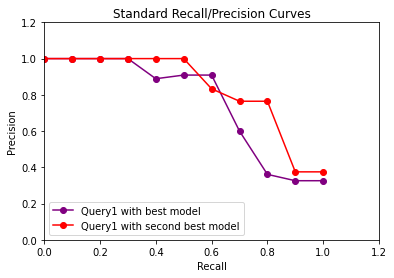

[7432, 55017, 25299, 40871, 2114, 57123, 56865, 13373, 45548, 17607, 1816, 51907, 38305, 54748, 265, 32674, 8110, 41459, 58481, 33571, 36727, 45518, 41889, 642, 22058, 44490, 10758, 4375, 10037, 45856, 27679, 30720, 37794, 48772, 56679, 50467, 735, 45289, 19852, 55511, 55505, 18988, 36677, 53409, 42604, 19647, 2033, 34523, 49720, 30773, 10642, 12358, 9726, 40749, 33251, 39620, 54548, 12483, 17166, 2185, 3494, 22408, 17944, 14499, 11135, 50197, 28542, 11269, 25378, 6649, 52837, 49855, 2520, 33746, 38637, 50019, 7110, 33858, 29722, 25080, 24452, 45278, 56342, 6522, 36164, 26535, 17309, 11856, 6421, 36165, 27793, 21070, 6158, 3978, 30926, 48216, 45203, 19944, 46500, 53693, 51474, 34483, 42077, 56330, 8341, 44126, 44591, 1185, 11087, 17304, 20090, 50650, 23979, 17273, 51396, 44534, 37486, 17442, 6135, 50609, 33632, 54953, 33009, 43945, 27474, 52375, 34266, 51356, 41319, 2134, 41872, 37864, 41876, 46347, 43515, 35526, 32496, 28543, 56494, 216, 36585, 22946, 30640, 56830, 56830, 56830, 10209

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))
<ipython-input-16-b48d4fe1c7be>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis_1, '-bo', color="red", label="Query%d with second best model"%(j+1))


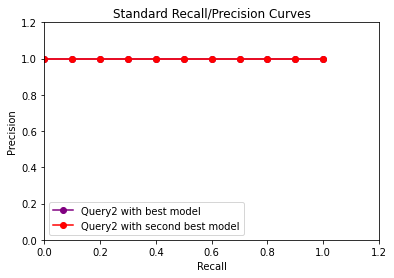

[33251, 13373, 9726, 2780, 45856, 41889, 4375, 10758, 31657, 52867, 29722, 22058, 22408, 54748, 27474, 43945, 17607, 51907, 26246, 30926, 15959, 37864, 1816, 17944, 56342, 49525, 33858, 39620, 47345, 17273, 41459, 45278, 51356, 10209, 35694, 19548, 32674, 44358, 49216, 17304, 42026, 56679, 37896, 7110, 11247, 37486, 34529, 41872, 36677, 45146, 28474, 27679, 3978, 2033, 26535, 11856, 52837, 2131, 17309, 25378, 58481, 56494, 209, 48779, 1185, 8110, 2114, 6522, 2520, 56330, 6158, 41319, 11135, 2185, 13559, 9441, 216, 45548, 39606, 53750, 41876, 22946, 23979, 44534, 51396, 50019, 642, 10612, 51474, 3865, 32767, 45289, 36164, 44591, 40373, 33571, 28648, 33632, 28250, 10535, 535, 30640, 7432, 36585, 40871, 50467, 45203, 48216, 19647, 735, 21185, 57009, 39496, 53409, 10037, 50650, 20090, 45518, 38305, 6421, 36165, 53660, 27793, 33009, 54953, 17166, 42077, 49855, 55017, 21070, 45860, 48772, 34483, 8341, 18988, 55511, 55505, 10642, 36727, 52375, 19944, 28543, 943, 57123, 56830, 56830, 56830, 11

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))
<ipython-input-16-b48d4fe1c7be>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis_1, '-bo', color="red", label="Query%d with second best model"%(j+1))


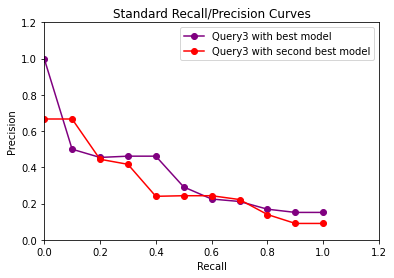

[30640, 37486, 53660, 26535, 535, 44126, 33746, 21070, 19852, 54548, 28648, 52663, 11087, 10037, 51474, 27858, 6135, 50609, 28474, 40373, 44135, 50640, 13559, 45278, 2131, 53750, 33620, 12483, 39620, 56679, 27793, 49855, 34529, 45289, 37896, 34266, 9050, 42026, 10209, 3978, 56342, 37794, 8110, 25299, 9441, 11135, 33813, 39606, 41459, 6421, 30720, 2185, 31657, 32767, 44490, 11356, 49216, 10612, 12358, 44489, 45860, 11269, 48779, 45856, 15959, 45518, 2780, 42077, 2033, 4375, 10758, 2134, 19944, 41876, 44534, 51396, 40871, 21185, 11247, 17309, 49525, 17273, 17166, 3494, 735, 52867, 54748, 49720, 28543, 7432, 36727, 17944, 22058, 45146, 2520, 7110, 36585, 33251, 25080, 40749, 6522, 55505, 55511, 18988, 28542, 44358, 38305, 47345, 35526, 43515, 46347, 32496, 36677, 35694, 46500, 36165, 56830, 56830, 56830, 56865, 39932, 27474, 43945, 47910, 43839, 24452, 26246, 6158, 2114, 37864, 8341, 30926, 51907, 17607, 33009, 54953, 9726, 6649, 22408, 20090, 50650, 45203, 48216, 41889, 53409, 58595, 426

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))
<ipython-input-16-b48d4fe1c7be>:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis_1, '-bo', color="red", label="Query%d with second best model"%(j+1))


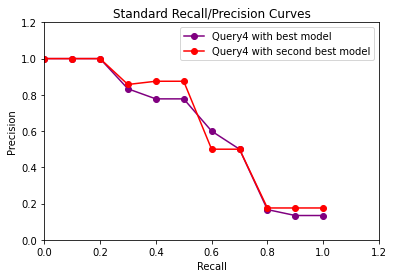

[33571, 17607, 51907, 265, 13373, 45548, 1816, 22058, 32674, 8110, 41889, 36727, 27679, 17944, 54748, 45856, 30720, 41459, 38305, 4375, 10758, 45518, 17304, 31657, 36677, 49216, 44490, 58481, 50467, 48772, 6158, 642, 33251, 24452, 45146, 37794, 9726, 10037, 25299, 22946, 51474, 57123, 2114, 17273, 40871, 56865, 42026, 17166, 43839, 55017, 7432, 46500, 36165, 15959, 42077, 10612, 45289, 34483, 19852, 6421, 53409, 25080, 55511, 55505, 18988, 42604, 34523, 2185, 23979, 535, 19647, 216, 19944, 8341, 735, 56679, 17309, 52837, 41876, 11135, 41319, 30773, 3978, 49720, 37896, 44358, 44135, 50640, 49525, 45278, 10642, 2033, 28542, 51356, 37864, 39606, 50019, 41872, 56330, 26246, 22408, 14499, 33813, 17442, 52375, 35694, 26535, 9441, 28474, 48216, 45203, 3494, 52867, 53750, 30926, 39620, 44534, 51396, 11856, 11269, 34529, 12483, 21070, 40749, 33009, 54953, 47345, 56342, 19548, 25378, 56494, 2780, 9050, 54548, 28543, 49855, 2131, 50609, 6135, 33620, 56830, 56830, 56830, 7110, 13559, 209, 12358, 2

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))


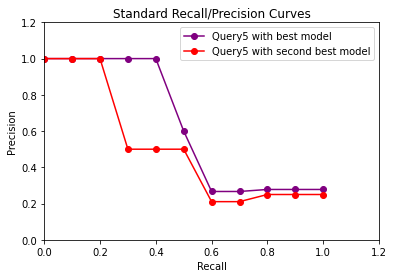

[46500, 41319, 52375, 10612, 39932, 45860, 8341, 42077, 27474, 43945, 50197, 45146, 11356, 17166, 53750, 3865, 51356, 24452, 37794, 943, 7110, 44490, 3978, 9050, 3494, 12358, 735, 34266, 34483, 42604, 53409, 30640, 38637, 36165, 10037, 58595, 41872, 49720, 28648, 1816, 52837, 53693, 51030, 33632, 51396, 44534, 17442, 56679, 27793, 49855, 34523, 216, 56865, 44489, 44126, 2185, 50650, 20090, 209, 32767, 6649, 9441, 11135, 30926, 39606, 55511, 18988, 55505, 2520, 17273, 45289, 35694, 36677, 37864, 32496, 35526, 46347, 43515, 21185, 17304, 25080, 34529, 40749, 33620, 19852, 44358, 41889, 27679, 53660, 14499, 50019, 45518, 52663, 33813, 13559, 6135, 50609, 19647, 33746, 55017, 33571, 13373, 30773, 17944, 19548, 265, 36585, 51474, 6158, 48781, 2114, 40871, 37486, 2134, 642, 23979, 10642, 49525, 56342, 28542, 12483, 31657, 54748, 50640, 44135, 2131, 48772, 11269, 56830, 56830, 56830, 41876, 45856, 26246, 42026, 33009, 54953, 37896, 56494, 10535, 28250, 6421, 17607, 57009, 39496, 48216, 45203,

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))


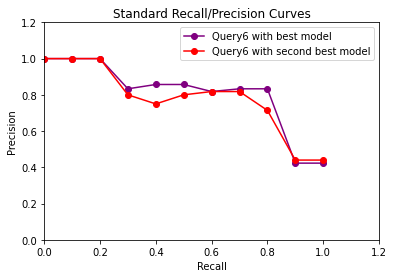

[209, 36165, 38637, 216, 32767, 943, 47345, 7110, 51356, 37864, 3494, 44358, 6649, 33632, 11356, 42026, 25080, 2185, 44490, 41872, 45289, 51030, 39606, 44534, 51396, 22946, 34483, 43515, 46347, 35526, 32496, 37794, 735, 44489, 34529, 33620, 53409, 40749, 56679, 642, 10642, 34523, 24452, 50197, 50609, 6135, 50467, 17442, 2520, 49855, 28250, 10535, 30773, 6421, 10037, 45518, 39620, 27793, 56865, 30926, 28542, 21185, 48781, 33813, 48772, 12358, 13559, 9441, 33858, 25378, 3978, 49720, 58595, 10209, 56342, 6522, 48779, 28474, 43945, 27474, 36677, 42604, 9050, 27858, 44135, 50640, 19647, 47910, 15959, 23979, 19548, 53693, 56494, 45548, 1816, 52663, 37896, 42077, 14499, 51907, 11269, 34266, 44591, 41319, 45860, 45146, 48216, 45203, 57009, 39496, 36164, 43839, 20090, 50650, 1185, 45278, 11856, 39932, 33009, 54953, 52375, 18988, 55505, 55511, 41459, 11135, 54548, 17273, 46500, 58481, 28543, 54748, 26246, 41876, 17166, 10612, 53750, 57123, 33746, 55017, 36585, 17607, 50019, 22408, 52867, 3865, 8

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))


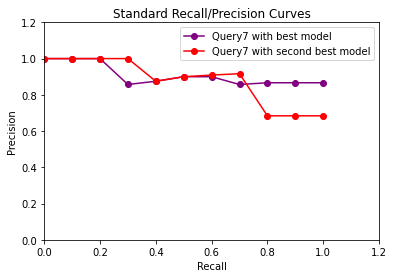

[642, 45518, 3494, 10642, 53409, 37794, 41872, 735, 44490, 33632, 38637, 56865, 44489, 47345, 28542, 10037, 36165, 51907, 40749, 19548, 11856, 209, 37864, 25299, 2185, 6649, 943, 39606, 7110, 17944, 51356, 17607, 216, 50467, 11356, 13373, 32767, 56679, 36677, 6421, 1816, 8110, 52375, 32674, 45856, 45548, 42026, 47910, 11269, 44534, 51396, 39620, 31657, 30773, 36727, 6135, 50609, 18988, 55505, 55511, 33571, 38305, 25080, 53660, 34523, 27679, 265, 2520, 25378, 8341, 41889, 4375, 10758, 58481, 28250, 10535, 41459, 54548, 30720, 45860, 12358, 44358, 46500, 2114, 45289, 22058, 30640, 34529, 34483, 51030, 53750, 55017, 15959, 54953, 33009, 54748, 7432, 42077, 28543, 57123, 44126, 48772, 40871, 1185, 9726, 11087, 19852, 34266, 33858, 36164, 535, 56342, 48779, 26535, 41876, 41319, 48781, 37896, 33620, 52837, 51474, 56330, 24452, 27858, 9050, 22408, 50019, 36585, 12483, 50197, 45278, 23979, 2033, 21070, 43839, 26246, 19647, 28648, 20090, 50650, 33813, 11247, 42604, 33251, 30926, 10209, 17273, 4

<ipython-input-16-b48d4fe1c7be>:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))


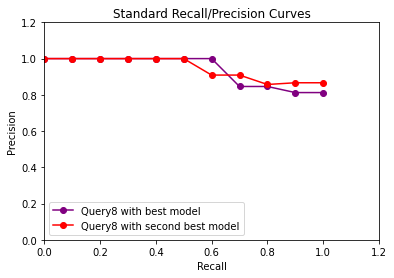


Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.1  0.19 0.26 0.32 0.4  0.46 0.49 0.53 0.58 0.62]
average Precision@1~10:  [1.   0.94 0.88 0.84 0.8  0.79 0.73 0.7  0.71 0.69]
average F1measure@1~10:  [0.18 0.31 0.39 0.45 0.51 0.56 0.56 0.58 0.61 0.63]


<ipython-input-16-b48d4fe1c7be>:86: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, av_y_axis, '-bo', color="blue", label="Average with best model")
<ipython-input-16-b48d4fe1c7be>:87: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, second_model_av_y_axis, '-bo', color="green", label="Average with second best model")


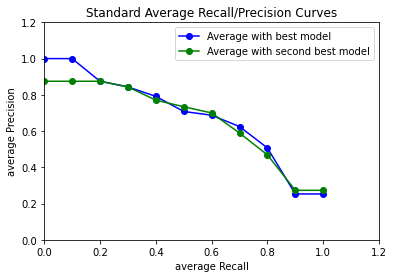

[1.0, 1.0, 0.875, 0.84375, 0.7916666666666666, 0.7083333333333333, 0.6875, 0.625, 0.5069444444444444, 0.2530487804878049, 0.2530487804878049]
[[1.0, 1.0, 1.0, 1.0, 0.8888888888888888, 0.9090909090909091, 0.9090909090909091, 0.6, 0.3611111111111111, 0.32608695652173914, 0.32608695652173914], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 0.5, 0.45454545454545453, 0.46153846153846156, 0.46153846153846156, 0.2916666666666667, 0.225, 0.21153846153846154, 0.16901408450704225, 0.1511627906976744, 0.1511627906976744], [1.0, 1.0, 1.0, 0.8333333333333334, 0.7777777777777778, 0.7777777777777778, 0.6, 0.5, 0.16666666666666666, 0.13402061855670103, 0.13402061855670103], [1.0, 1.0, 1.0, 1.0, 1.0, 0.6, 0.26666666666666666, 0.26666666666666666, 0.2777777777777778, 0.2777777777777778, 0.2777777777777778], [1.0, 1.0, 1.0, 0.8333333333333334, 0.8571428571428571, 0.8571428571428571, 0.8181818181818182, 0.8333333333333334, 0.8333333333333334, 0.4230769230769231, 0.4230769230769231], [1.0, 

In [16]:
AllRecall = []
AllPrecision = []
AllF1measure = []
y_axis_list = []

second_model_y_axis = [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.8333333333333334, 0.7647058823529411, 0.7647058823529411, 0.375, 0.375], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [0.6666666666666666, 0.6666666666666666, 0.4444444444444444, 0.4166666666666667, 0.24, 0.24324324324324326, 0.24324324324324326, 0.2222222222222222, 0.13953488372093023, 0.09027777777777778, 0.09027777777777778], [1.0, 1.0, 1.0, 0.8571428571428571, 0.875, 0.875, 0.5, 0.5, 0.17567567567567569, 0.17567567567567569, 0.17567567567567569], [1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.21052631578947367, 0.21052631578947367, 0.25, 0.25, 0.25], [1.0, 1.0, 1.0, 0.8, 0.75, 0.8, 0.8181818181818182, 0.8181818181818182, 0.7142857142857143, 0.44, 0.44], [1.0, 1.0, 1.0, 1.0, 0.875, 0.9, 0.9090909090909091, 0.9166666666666666, 0.6842105263157895, 0.6842105263157895, 0.6842105263157895], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9090909090909091, 0.9090909090909091, 0.8571428571428571, 0.8666666666666667, 0.8666666666666667]]
second_model_av_y_axis = [0.875, 0.875, 0.875, 0.84375, 0.7708333333333334, 0.734375, 0.7000000000000001, 0.5892857142857143, 0.46875, 0.2730263157894737, 0.2730263157894737]
# loop queries
j = 0

for query in querys:
  # retrieval
  encoded_query = preprocess_query(query, 'tfidf', vocab)
  transformed_query = trunc_SVD_model.transform(encoded_query)
  similarities = cosine_similarity(approx_Xtrain, transformed_query)

  # rank the index
  indexes = np.argsort(similarities.flat)[::-1]
  # replicate the indexes to be used for evaluate the ranked documents between re_ID and itself.
  doc_indexes = []
  for i in range(len(indexes)):
    doc_indexes.append(df.iloc[indexes[i]]["ID"])
  print(doc_indexes)
  # Mark the relevant index
  re_mark = []
  for i in range(len(indexes)):
    if (doc_indexes[i]) in re_ID[j]:
      re_mark.append(1)
    else:
      re_mark.append(0)
  # print(re_mark)

  # compute Recall, Precision, F1-measure
  Recall, Precision, F1measure = compute_R_P_F1(re_mark=re_mark, QuRe_ID=re_ID[j])
  
  print('\n' + 'Query%d: '%(j+1) + query)
  for i in range(10):
    print("Top " + str(i+1) + ' result: ID%d '%(doc_indexes[i]), lines[indexes[i]])
  Recall = np.array(Recall)
  Precision = np.array(Precision)
  F1measure = np.array(F1measure)
  # print(re_mark)
  print("Recall@1~10: ", np.around(Recall[:10],2))
  print("Precision@1~10: ", np.around(Precision[:10],2))
  print("F1measure@1~10: ", np.around(F1measure[:10],2))

  # save
  AllRecall.append(Recall)
  AllPrecision.append(Precision)
  AllF1measure.append(F1measure)

  # plot R/P curve
  x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  y_axis = compute_RP_yaxis(Precision=Precision, Recall=Recall)
  y_axis_1 = second_model_y_axis[j]
  y_axis_list.append(y_axis)
  plt.plot(x_axis, y_axis, '-bo', color="purple", label="Query%d with best model"%(j+1))
  plt.plot(x_axis, y_axis_1, '-bo', color="red", label="Query%d with second best model"%(j+1))
  plt.xlim(0, 1.2)
  plt.ylim(0, 1.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Standard Recall/Precision Curves')
  plt.legend()
  plt.show()

  j += 1

# compute average Recall, average Precision, average F1-measure
AllRecall = np.array(AllRecall)
AllPrecision = np.array(AllPrecision)
AllF1measure = np.array(AllF1measure)
#calculate the average metrices for 8 queries
AveRecall = (AllRecall[0] + AllRecall[1] + AllRecall[2] + AllRecall[3] + AllRecall[4] + AllRecall[5] + AllRecall[6] + AllRecall[7])/8
AvePrecision = (AllPrecision[0] + AllPrecision[1] + AllPrecision[2] + AllPrecision[3] + AllPrecision[4] + AllPrecision[5] + AllPrecision[6] + AllPrecision[7])/8
AveF1measure = (AllF1measure[0] + AllF1measure[1] + AllF1measure[2] + AllF1measure[3] + AllF1measure[4] + AllF1measure[5] + AllF1measure[6] + AllF1measure[7])/8

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(AveRecall[:10],2))
print("average Precision@1~10: ", np.around(AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(AveF1measure[:10],2))

# plot average R/P curve
x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
av_y_axis = compute_RP_yaxis(Precision=AvePrecision, Recall=AveRecall)
plt.plot(x_axis, av_y_axis, '-bo', color="blue", label="Average with best model")
plt.plot(x_axis, second_model_av_y_axis, '-bo', color="green", label="Average with second best model")
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.xlabel('average Recall')
plt.ylabel('average Precision')
plt.title('Standard Average Recall/Precision Curves')
plt.legend()
plt.show()

print(av_y_axis)
print(y_axis_list)

The weighting strategy utilised in both of the models used in the LSI methodology was "tfidf," however the truncation was different. In contrast to the second model, which utilised a k value of 100, the best model employed a k value of 50.

The model with reduced truncation performs better in the majority of the queries, with the exception of questions 7 and 4, as can be seen in the results for each query. Moreover, it has a higher precision for a higher recall in the typical graph.

##<b>3a:Neural information retrieval (NIR)</b>

###<b>Load the Pretrained BERT Model</b>

In [17]:
# allows us to use the transformers library for BERT
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')

# Loading the Pre-trained BERT model
# For DistilBERT:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

# convert to series
lines_series = pd.Series(lines)
querys = pd.Series(querys)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


###<b>Embed documents</b>

In [19]:
N = len(lines)

with torch.no_grad():
    # Tokenization
    docs_tokenized = lines_series[0:N].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

    # padding
    max_len = 0
    q = 0
    for i in docs_tokenized.values:
        
        # BERT only accept maximum 512 values
        if len(i) > 512:
            temp = docs_tokenized.values[q]
            docs_tokenized.values[q] = temp[:512]
            i = docs_tokenized.values[q]
            print('too much tokenized.values for BERT, only 512 are taken')

        # print(len(i))
        if len(i) > max_len:
            max_len = len(i)
        q += 1

    padded = np.array([i + [0]*(max_len-len(i)) for i in docs_tokenized.values])
    np.array(padded).shape

    # masking
    attention_mask = np.where(padded != 0, 1, 0)
    attention_mask.shape

    # run the model
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)

    print(input_ids.shape)

    docs_last_hidden_states = model(input_ids, attention_mask=attention_mask)

    docs_train_features = docs_last_hidden_states[0][:,0,:].numpy()

print(len(docs_train_features))  
print(docs_train_features)

torch.Size([200, 62])
200
[[ 0.02998011 -0.20458576  0.15260002 ... -0.23324224  0.21446098
   0.13014548]
 [-0.16549483 -0.13651738  0.06625547 ... -0.14921053  0.06292623
   0.08502148]
 [-0.1957188  -0.0874033   0.1424557  ... -0.10266706  0.09940173
  -0.11208817]
 ...
 [-0.06946528 -0.09745412  0.19692808 ... -0.195269    0.37312412
   0.06038749]
 [-0.06946528 -0.09745412  0.19692808 ... -0.195269    0.37312412
   0.06038749]
 [-0.06946528 -0.09745412  0.19692808 ... -0.195269    0.37312412
   0.06038749]]


###<b>Embed querys</b>

In [20]:
N = len(querys)

with torch.no_grad():
    # Tokenization
    querys_tokenized = querys[0:N].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

    # padding
    max_len = 0
    q = 0
    for i in querys_tokenized.values:
        
        # BERT only accept maximum 512 values
        if len(i) > 512:
            temp = querys_tokenized.values[q]
            querys_tokenized.values[q] = temp[:512]
            i = querys_tokenized.values[q]
            print('too much tokenized.values for BERT, only 512 are taken')

        # print(len(i))
        if len(i) > max_len:
            max_len = len(i)
        q += 1

    padded = np.array([i + [0]*(max_len-len(i)) for i in querys_tokenized.values])
    np.array(padded).shape

    # masking
    attention_mask = np.where(padded != 0, 1, 0)
    attention_mask.shape

    # run the model
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)

    print(input_ids.shape)

    querys_last_hidden_states = model(input_ids, attention_mask=attention_mask)

    querys_train_features = querys_last_hidden_states[0][:,0,:].numpy()

print(len(querys_train_features))  
print(querys_train_features)

torch.Size([8, 18])
8
[[-0.12788653 -0.01702876  0.09957712 ...  0.10863034  0.16076267
   0.21425585]
 [-0.05202062 -0.05795885  0.03165561 ... -0.11173039  0.23491736
   0.198168  ]
 [-0.22389089 -0.16109748  0.25639942 ... -0.17347279  0.35275427
   0.14028662]
 ...
 [-0.12223587 -0.20315544  0.16844761 ... -0.24238919  0.32865086
   0.1196133 ]
 [-0.0409643  -0.08816109  0.11096273 ... -0.10176287  0.22200571
   0.18110344]
 [-0.12579714 -0.28400517  0.10940847 ... -0.1618176   0.32994768
   0.01563641]]


##<b>Evaluation of Ranked Information Retrieval with NRI</b>

[17442, 6522, 26246, 41876, 58481, 48779, 10535, 28250, 56330, 11247, 9050, 3865, 3494, 37896, 52663, 22946, 45203, 48216, 11087, 57123, 17166, 19852, 34266, 36585, 50197, 32674, 10209, 22058, 52375, 52837, 58595, 30773, 2134, 56494, 642, 50640, 44135, 30926, 33858, 10642, 41459, 9726, 45548, 8110, 1185, 11269, 28543, 22408, 36164, 56865, 53660, 14499, 19944, 53409, 51396, 44534, 43839, 49720, 39932, 6421, 37486, 26535, 943, 30720, 25299, 1816, 56830, 56830, 56830, 13373, 30640, 52867, 209, 17944, 2185, 44126, 48781, 2520, 44490, 53693, 13559, 27858, 535, 54748, 10758, 4375, 12358, 44489, 2033, 51474, 44591, 38305, 42077, 265, 47345, 28474, 33571, 24452, 25378, 50019, 11856, 45518, 45146, 28542, 32767, 2131, 27679, 8341, 42604, 28648, 41889, 39606, 35694, 11356, 17304, 36727, 19548, 7110, 17607, 36165, 6158, 54548, 15959, 17309, 45278, 2114, 23979, 47910, 40373, 11135, 34523, 20090, 50650, 36677, 9441, 39496, 57009, 56342, 17273, 21070, 40749, 37794, 735, 29722, 49525, 41319, 37864, 33

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


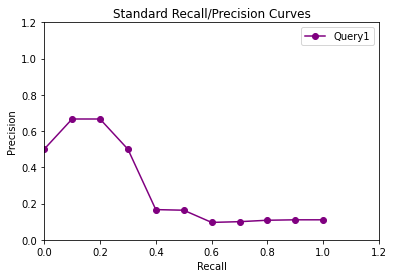

[57123, 3494, 11087, 9050, 56330, 41876, 11247, 3865, 6522, 2134, 10535, 28250, 8110, 48779, 19944, 22058, 10209, 52837, 17442, 30926, 26246, 19852, 52375, 22946, 58481, 37896, 52663, 642, 50197, 10642, 17166, 13373, 45203, 48216, 32674, 41459, 45548, 30773, 53660, 44534, 51396, 30720, 11269, 44135, 50640, 36585, 52867, 58595, 1816, 22408, 34266, 53409, 56865, 56830, 56830, 56830, 9726, 43839, 54748, 943, 17944, 37486, 10758, 4375, 44490, 36164, 2520, 2185, 49720, 30640, 14499, 42077, 39932, 535, 48781, 44126, 33571, 28474, 13559, 265, 28543, 53693, 56494, 6421, 44489, 209, 26535, 27858, 33858, 1185, 25299, 47345, 38305, 50019, 41889, 24452, 44591, 45518, 17607, 51474, 12358, 25378, 36727, 39606, 2131, 17304, 27679, 45146, 11856, 28542, 2033, 42604, 32767, 36165, 11356, 7110, 28648, 36677, 8341, 2114, 47910, 6158, 54548, 35694, 15959, 29722, 19548, 23979, 56342, 40373, 9441, 45278, 39496, 57009, 34523, 37864, 735, 42026, 17273, 50609, 6135, 37794, 40871, 21070, 33746, 40749, 20090, 506

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


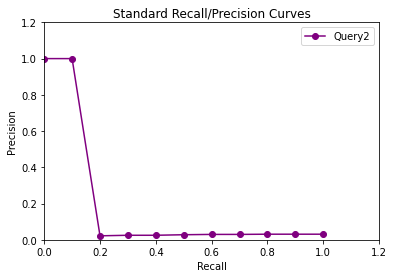

[22058, 32674, 30926, 57123, 41876, 8110, 3494, 17442, 28250, 10535, 11087, 19944, 3865, 52867, 56330, 10209, 11247, 50197, 6522, 45548, 22408, 13373, 58481, 642, 9050, 48216, 45203, 26246, 2134, 10642, 52663, 17166, 52837, 48779, 54748, 1816, 10758, 4375, 17944, 30773, 37896, 52375, 22946, 56494, 34266, 36585, 56830, 56830, 56830, 19852, 9726, 41459, 58595, 53660, 2520, 48781, 44534, 51396, 11269, 265, 56865, 14499, 53409, 44135, 50640, 535, 42077, 33571, 43839, 44490, 49720, 943, 41889, 28543, 30720, 2185, 17304, 50019, 36164, 12358, 39932, 37486, 33858, 53693, 17607, 30640, 26535, 1185, 27679, 51474, 27858, 209, 28474, 38305, 47345, 6421, 44489, 44126, 13559, 45518, 29722, 39606, 25299, 44591, 24452, 25378, 2131, 36727, 6158, 28542, 42604, 8341, 36677, 45146, 32767, 2033, 15959, 11856, 11356, 7110, 28648, 40373, 36165, 47910, 35694, 45278, 19548, 2114, 42026, 54548, 56342, 33251, 39496, 57009, 23979, 9441, 20090, 50650, 37864, 17309, 11135, 21070, 6135, 50609, 34523, 17273, 735, 377

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


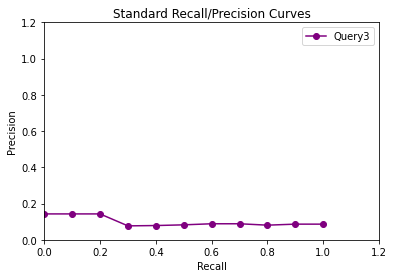

[2134, 19852, 52663, 56330, 53660, 11087, 3494, 6522, 57123, 11247, 30926, 52375, 3865, 9050, 19944, 30640, 41876, 44126, 50197, 22946, 52837, 10535, 28250, 1816, 10209, 37486, 45548, 8110, 50640, 44135, 26246, 642, 22058, 17166, 48779, 36585, 58481, 37896, 13373, 43839, 17442, 10642, 41459, 45203, 48216, 52867, 53409, 51396, 44534, 56865, 32674, 30773, 535, 34266, 17944, 4375, 10758, 22408, 56830, 56830, 56830, 11269, 30720, 943, 58595, 2185, 44490, 26535, 265, 13559, 49720, 33571, 28474, 9726, 51474, 2520, 28543, 48781, 42077, 39932, 54748, 33858, 56494, 209, 27858, 14499, 36164, 50019, 6421, 25299, 53693, 2131, 41889, 1185, 44489, 24452, 28648, 47345, 38305, 17304, 27679, 17607, 45518, 12358, 44591, 25378, 45146, 39606, 32767, 36727, 2033, 8341, 42604, 28542, 36677, 7110, 11356, 54548, 40373, 11856, 29722, 21070, 15959, 36165, 47910, 19548, 39496, 57009, 2114, 45278, 23979, 6158, 35694, 56342, 9441, 6135, 50609, 34523, 735, 37794, 33746, 37864, 42026, 17273, 50650, 20090, 33251, 408

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


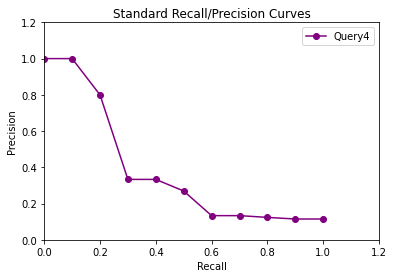

[22058, 30926, 11087, 57123, 6522, 56330, 41876, 52663, 10535, 28250, 17442, 30773, 45548, 58481, 11247, 1816, 8110, 26246, 32674, 9050, 19852, 13373, 37896, 10209, 642, 52867, 41459, 19944, 2134, 22408, 17944, 22946, 3494, 48779, 17166, 52837, 3865, 50197, 48216, 45203, 52375, 10758, 4375, 56830, 56830, 56830, 53409, 54748, 53660, 30720, 9726, 36585, 33571, 49720, 14499, 34266, 10642, 50640, 44135, 51396, 44534, 56494, 265, 48781, 56865, 58595, 37486, 28543, 2520, 30640, 943, 11269, 43839, 44126, 26535, 535, 33858, 17607, 12358, 27679, 2185, 51474, 44490, 50019, 36164, 39932, 41889, 25299, 27858, 209, 38305, 42077, 17304, 6421, 1185, 13559, 53693, 47345, 2131, 28474, 45518, 39606, 44591, 44489, 24452, 36727, 32767, 2033, 45146, 25378, 11856, 8341, 6158, 29722, 36677, 42604, 2114, 7110, 28542, 15959, 28648, 19548, 40373, 11356, 35694, 36165, 47910, 45278, 11135, 54548, 20090, 50650, 39496, 57009, 37864, 23979, 9441, 21070, 42026, 37794, 33746, 6135, 50609, 17309, 40871, 56342, 34523, 3

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


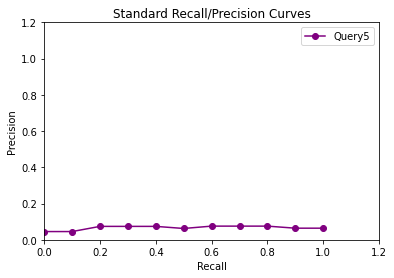

[56865, 53409, 642, 52375, 17166, 50197, 44490, 39932, 8341, 209, 45518, 10642, 51396, 44534, 2185, 42077, 535, 44489, 58595, 28542, 1185, 24452, 12358, 36585, 45548, 6522, 34266, 25378, 28648, 47345, 3865, 58481, 51474, 36165, 32674, 943, 30640, 27858, 22408, 52837, 1816, 45203, 48216, 53693, 11356, 735, 2131, 41459, 28543, 43839, 53660, 32767, 25299, 6421, 49720, 3494, 39606, 9726, 44591, 38305, 44135, 50640, 17944, 48779, 36677, 2520, 22058, 41319, 57123, 11269, 13373, 54748, 28474, 8110, 30720, 37896, 10209, 22946, 30926, 37486, 19852, 17442, 52663, 14499, 33858, 36727, 42604, 56830, 56830, 56830, 26535, 30773, 13559, 26246, 45146, 44126, 37794, 11856, 41876, 40373, 10758, 4375, 34523, 52867, 28250, 10535, 36164, 265, 9050, 2033, 56494, 47910, 2114, 33571, 17607, 21070, 27679, 11087, 2134, 41889, 42026, 40749, 7110, 45278, 56330, 50019, 48781, 6158, 39496, 57009, 23979, 38637, 6135, 50609, 45860, 29722, 33746, 15959, 17309, 19548, 11247, 27474, 43945, 17273, 9441, 11135, 17304, 506

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


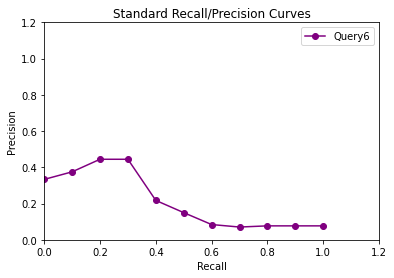

[53409, 209, 28543, 51396, 44534, 10642, 642, 6522, 22946, 9050, 57123, 37896, 52663, 17166, 3865, 30773, 3494, 48779, 34266, 58481, 10209, 30926, 56865, 52375, 2520, 48216, 45203, 50197, 17442, 41876, 2185, 10535, 28250, 44490, 45548, 44135, 50640, 6421, 26246, 58595, 13373, 30720, 43839, 52837, 56830, 56830, 56830, 11087, 28474, 41459, 22058, 49720, 28542, 45518, 943, 24452, 47345, 32674, 14499, 56330, 11269, 8110, 19852, 22408, 2134, 25299, 36585, 39932, 42077, 11247, 1816, 33858, 53660, 17944, 1185, 39606, 54748, 27858, 48781, 9726, 30640, 32767, 535, 12358, 38305, 36165, 19944, 52867, 56494, 10758, 4375, 37486, 53693, 33571, 44489, 44126, 25378, 265, 44591, 13559, 36164, 11856, 26535, 2114, 51474, 8341, 28648, 11356, 2131, 42604, 17607, 19548, 50019, 41889, 36677, 7110, 2033, 36727, 47910, 27679, 15959, 45146, 735, 23979, 41319, 37794, 34523, 17304, 6135, 50609, 40749, 40373, 42026, 45278, 9441, 56342, 39496, 57009, 54548, 38637, 35694, 6158, 11135, 50650, 20090, 21070, 33746, 378

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


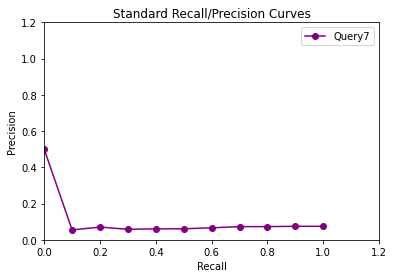

[642, 53409, 56865, 45518, 12358, 44490, 24452, 209, 39932, 17166, 51396, 44534, 2185, 52375, 58481, 41459, 49720, 38305, 28542, 735, 14499, 10642, 47345, 54748, 32767, 25299, 57123, 535, 17944, 2114, 45548, 58595, 25378, 44135, 50640, 56830, 56830, 56830, 37794, 53693, 44489, 22408, 50197, 42077, 1816, 943, 30720, 22058, 32674, 42604, 34266, 3865, 36677, 27858, 2131, 51474, 2520, 265, 30640, 1185, 28543, 6522, 28648, 28474, 37896, 48779, 8341, 36585, 36165, 6421, 52867, 39606, 30773, 7110, 11856, 42026, 9726, 3494, 30926, 53660, 11269, 2033, 13373, 48216, 45203, 19548, 40373, 9050, 8110, 17607, 4375, 10758, 50019, 52663, 41319, 36727, 43839, 44126, 11356, 45146, 44591, 17442, 22946, 52837, 41876, 48781, 26246, 10209, 13559, 41889, 33858, 39496, 57009, 6158, 19852, 37486, 45278, 36164, 34523, 27679, 11087, 28250, 10535, 47910, 15959, 23979, 11135, 50609, 6135, 40749, 26535, 33571, 33746, 56494, 9441, 56330, 2134, 40871, 33632, 44358, 21070, 10037, 17304, 38637, 29722, 43945, 27474, 112

<ipython-input-21-e4bb4a822847>:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))


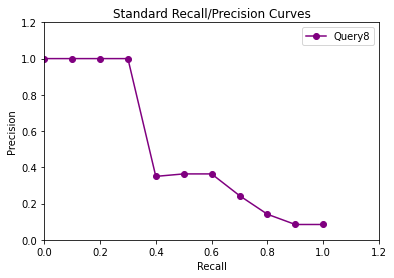

<ipython-input-21-e4bb4a822847>:78: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, BERT_av_y_axis, '-bo', color="blue", label="Average")



Average Recall, average Precision, average F1-measure: 
average Recall@1~10:  [0.04 0.07 0.08 0.12 0.14 0.17 0.17 0.18 0.19 0.19]
average Precision@1~10:  [0.38 0.38 0.33 0.38 0.35 0.35 0.3  0.28 0.26 0.25]
average F1measure@1~10:  [0.07 0.11 0.13 0.18 0.19 0.22 0.21 0.21 0.22 0.22]


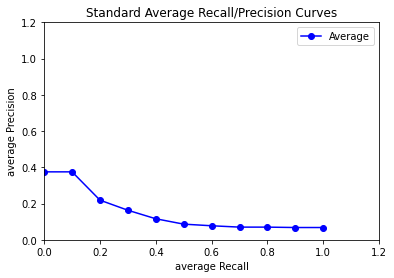

In [21]:
BERT_AllRecall = []
BERT_AllPrecision = []
BERT_AllF1measure = []
BERT_y_axis_list = []
j = 0

for index,query in enumerate(querys):
  query_features = querys_train_features[index,:]
  query_features = query_features.reshape(1,-1)
  BERT_similarities = cosine_similarity(docs_train_features,query_features)
  # rank the index
  BERT_indexes = np.argsort(BERT_similarities.flat)[::-1]
  # replicate the indexes to be used for evaluate the ranked documents between re_ID and itself.
  BERT_doc_indexes = []
  for i in range(len(BERT_indexes)):
    BERT_doc_indexes.append(df.iloc[BERT_indexes[i]]["ID"])
  print(BERT_doc_indexes)
  # Mark the relevant index
  BERT_re_mark = []
  for k in range(len(BERT_indexes)):
    if (BERT_doc_indexes[k]) in re_ID[j]:
      BERT_re_mark.append(1)
    else:
      BERT_re_mark.append(0)
    # print(re_mark)

  # compute Recall, Precision, F1-measure
  BERT_Recall, BERT_Precision, BERT_F1measure = compute_R_P_F1(re_mark=BERT_re_mark, QuRe_ID=re_ID[j])
  
  print('\n' + 'Query%d: '%(j+1) + query)
  for x in range(10):
    print("Top " + str(x+1) + ' result: ID%d '%(BERT_doc_indexes[x]), lines[BERT_indexes[x]])
  BERT_Recall = np.array(BERT_Recall)
  BERT_Precision = np.array(BERT_Precision)
  BERT_F1measure = np.array(BERT_F1measure)
  # print(re_mark)
  print("Recall@1~10: ", np.around(BERT_Recall[:10],2))
  print("Precision@1~10: ", np.around(BERT_Precision[:10],2))
  print("F1measure@1~10: ", np.around(BERT_F1measure[:10],2))

  # save
  BERT_AllRecall.append(BERT_Recall)
  BERT_AllPrecision.append(BERT_Precision)
  BERT_AllF1measure.append(BERT_F1measure)

  # plot R/P curve
  x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  BERT_y_axis = compute_RP_yaxis(Precision=BERT_Precision, Recall=BERT_Recall)
  BERT_y_axis_list.append(BERT_y_axis)
  plt.plot(x_axis, BERT_y_axis, '-bo', color="purple", label="Query%d"%(j+1))
  plt.xlim(0, 1.2)
  plt.ylim(0, 1.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Standard Recall/Precision Curves')
  plt.legend()
  plt.show()

  j += 1

# compute average Recall, average Precision, average F1-measure
BERT_AllRecall = np.array(BERT_AllRecall)
BERT_AllPrecision = np.array(BERT_AllPrecision)
BERT_AllF1measure = np.array(BERT_AllF1measure)
#calculate the average metrices for 8 queries
BERT_AveRecall = (BERT_AllRecall[0] + BERT_AllRecall[1] + BERT_AllRecall[2] + BERT_AllRecall[3] + BERT_AllRecall[4] + BERT_AllRecall[5] + BERT_AllRecall[6] + BERT_AllRecall[7])/8
BERT_AvePrecision = (BERT_AllPrecision[0] + BERT_AllPrecision[1] + BERT_AllPrecision[2] + BERT_AllPrecision[3] + BERT_AllPrecision[4] + BERT_AllPrecision[5] + BERT_AllPrecision[6] + BERT_AllPrecision[7])/8
BERT_AveF1measure = (BERT_AllF1measure[0] + BERT_AllF1measure[1] + BERT_AllF1measure[2] + BERT_AllF1measure[3] + BERT_AllF1measure[4] + BERT_AllF1measure[5] + BERT_AllF1measure[6] + BERT_AllF1measure[7])/8

print("\nAverage Recall, average Precision, average F1-measure: ")
print("average Recall@1~10: ", np.around(BERT_AveRecall[:10],2))
print("average Precision@1~10: ", np.around(BERT_AvePrecision[:10],2))
print("average F1measure@1~10: ", np.around(BERT_AveF1measure[:10],2))

# plot average R/P curve
x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
BERT_av_y_axis = compute_RP_yaxis(Precision=BERT_AvePrecision, Recall=BERT_AveRecall)
plt.plot(x_axis, BERT_av_y_axis, '-bo', color="blue", label="Average")
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.xlabel('average Recall')
plt.ylabel('average Precision')
plt.title('Standard Average Recall/Precision Curves')
plt.legend()
plt.show()

##<b>Comparision between LSI and NIR</b>


Query1: The ring is a great gift. My friend loves it


<ipython-input-22-abd8e5d30b4a>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, LSI_y_axis, '-bo', color="purple", label="Query%d with LSI"%(index+1))
<ipython-input-22-abd8e5d30b4a>:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, NRI_y_axis, '-bo', color="red", label="Query%d with NRI"%(index+1))


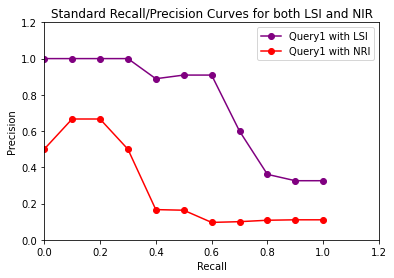


Query2: horrible bad quality bracelet


<ipython-input-22-abd8e5d30b4a>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.show()


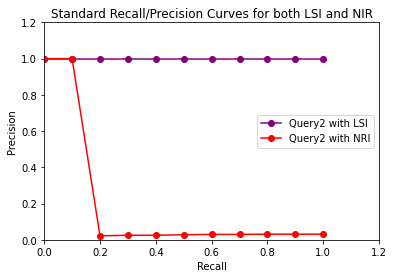


Query3: arrived promptly and happy with the seller


<ipython-input-22-abd8e5d30b4a>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.show()


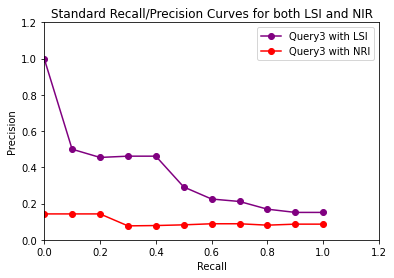


Query4: wear it with casual wear


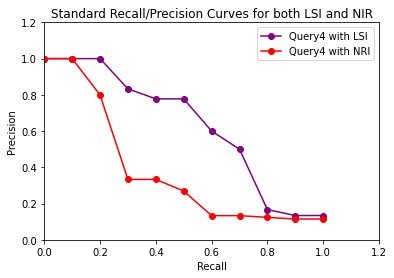


Query5: i expected better quality. i will return this item


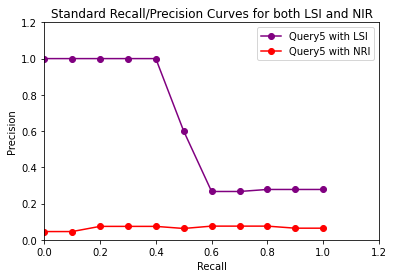


Query6: looks beautiful. The design is pretty. pefect and color is light


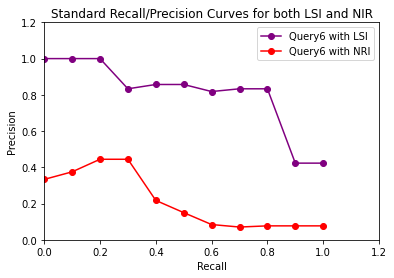


Query7: This ring looks nothing like the picture. the diamonds are small and not very noticeable


<ipython-input-22-abd8e5d30b4a>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.show()


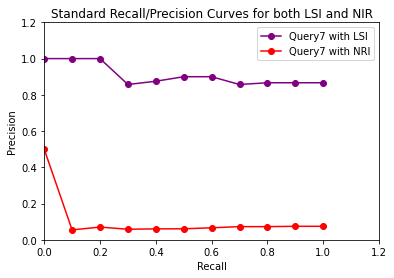


Query8: braclet looked just like its picture and is nice quality sterling silver.


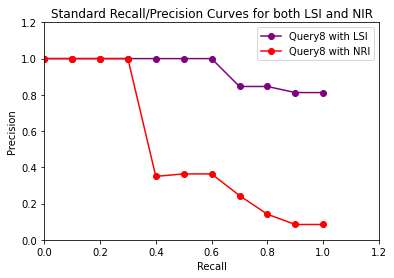

<ipython-input-22-abd8e5d30b4a>:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, av_LSI_y_axis, '-bo', color="blue", label="Average with LSI")
<ipython-input-22-abd8e5d30b4a>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x_axis, av_NRI_y_axis, '-bo', color="green", label="Average with NRI")


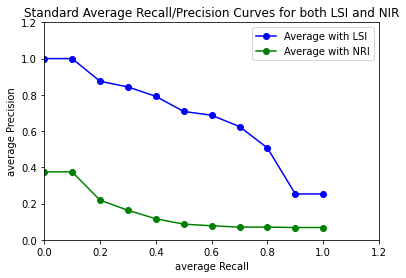

In [22]:
for index, query in enumerate(querys):
  # plot R/P curves for both NRI and LSI methods
  print('\n' + 'Query%d: '%(index+1) + query)
  x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
  LSI_y_axis = y_axis_list[index]
  NRI_y_axis = BERT_y_axis_list[index]
  plt.plot(x_axis, LSI_y_axis, '-bo', color="purple", label="Query%d with LSI"%(index+1))
  plt.plot(x_axis, NRI_y_axis, '-bo', color="red", label="Query%d with NRI"%(index+1))
  plt.xlim(0, 1.2)
  plt.ylim(0, 1.2)
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Standard Recall/Precision Curves for both LSI and NIR')
  plt.legend()
  plt.show()

# plot average R/P curves for both NRI and LSI methods
x_axis = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
av_LSI_y_axis = av_y_axis
av_NRI_y_axis = BERT_av_y_axis
plt.plot(x_axis, av_LSI_y_axis, '-bo', color="blue", label="Average with LSI")
plt.plot(x_axis, av_NRI_y_axis, '-bo', color="green", label="Average with NRI")
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.xlabel('average Recall')
plt.ylabel('average Precision')
plt.title('Standard Average Recall/Precision Curves for both LSI and NIR')
plt.legend()
plt.show()

  


In all queries, the precision from the LSI starts at roughly 1, indicating that the first few documents returned from all queries are also of high relevance. Nevertheless, as demonstrated by some searches returning high precision for the first few recovered documents and others with extremely low precision, not all documents retrieved using the BERT model are relevant.

When recall rises, LSI outperforms NRI, as evidenced by increased precision in average precision-recall graphs for recovered queries. Due to the intricacy of BERT and the variety of IDs, similarity matrix calculations may result in outputs that differ from the original document.

##<b>3b:Information retrieval by new query</b>



In this section, users are allowed to write their own queries and it will then be passed into the NIR to return the top 10 documents relating to their query.

###<b>Extract user query</b>

In [23]:
#extracts the query the user wishes to type in
typed_query = input("Type in your query: ")

Type in your query: diamonds are shiny


In [24]:
user_query_list = []
user_query_list.append(typed_query)
user_query = pd.Series(user_query_list)
print(user_query)

0    diamonds are shiny
dtype: object


###<b>Embed user query</b>

In [25]:
with torch.no_grad():
    # Tokenization
    query_tokenized = user_query.apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

    # padding
    max_len = 0
    q = 0
    for i in query_tokenized.values:
        
        # BERT only accept maximum 512 values
        if len(i) > 512:
            temp = query_tokenized.values[q]
            query_tokenized.values[q] = temp[:512]
            i = query_tokenized.values[q]
            print('too much tokenized.values for BERT, only 512 are taken')

        # print(len(i))
        if len(i) > max_len:
            max_len = len(i)
        q += 1

    padded = np.array([i + [0]*(max_len-len(i)) for i in query_tokenized.values])
    np.array(padded).shape

    # masking
    attention_mask = np.where(padded != 0, 1, 0)
    attention_mask.shape

    # run the model
    input_ids = torch.tensor(padded)  
    attention_mask = torch.tensor(attention_mask)

    print(input_ids.shape)

    query_last_hidden_states = model(input_ids, attention_mask=attention_mask)

    query_train_features = query_last_hidden_states[0][:,0,:].numpy()

print(len(query_train_features))  

torch.Size([1, 5])
1


###<b>NIR</b>

In [26]:
# returns the top 10 similar documents to the query typed by the user
user_docs = []
ratings_list = []
id_list = []

for query in user_query:
  user_BERT_similarities = cosine_similarity(docs_train_features,query_train_features)

  Top_n_reviews = 10
  # indexes = np.argsort(similarities.flat)[-Top_n_reviews:]
  user_indexes = np.argsort(user_BERT_similarities.flat)[::-1]

  print('\n' + 'User Query : {}'.format(user_query))
  for i in range(Top_n_reviews):
    print("Top " + str(i+1) + ' result:')
    print("Reviews ID: %d"%(df.iloc[user_indexes[i]]["ID"]))
    print(lines[user_indexes[i]])
    print("Ratings: %d"%(df.iloc[user_indexes[i]]["Ratings"]))
    user_docs.append(lines[user_indexes[i]])
    ratings_list.append(df.iloc[user_indexes[i]]["Ratings"])
    id_list.append(df.iloc[user_indexes[i]]["ID"])

    # print("similarities: " + str(similarities.flat[indexes[i]]))



User Query : 0    diamonds are shiny
dtype: object
Top 1 result:
Reviews ID: 6522
love ring suggest every ring jewelry
Ratings: 5
Top 2 result:
Reviews ID: 3865
sparkle pretty dainty looking
Ratings: 4
Top 3 result:
Reviews ID: 10209
work perfectly ring ring
Ratings: 5
Top 4 result:
Reviews ID: 9050
ring pretty enough metal ring
Ratings: 3
Top 5 result:
Reviews ID: 3494
nice look picture like
Ratings: 5
Top 6 result:
Reviews ID: 22946
ring little small ring finger would better pinky ring
Ratings: 3
Top 7 result:
Reviews ID: 11247
always wanted price love
Ratings: 5
Top 8 result:
Reviews ID: 11087
wanted favorite mine wear metal
Ratings: 2
Top 9 result:
Reviews ID: 56330
great way without wearing
Ratings: 5
Top 10 result:
Reviews ID: 28250
wanted know ring like ring one ring beyond gorgeous love
Ratings: 2


The ratings are used to enable user engagement with results and limit printing retrieved documents whose ratings match the user's preferences.

In [27]:
# extracts the rating the user wishes to see
rating_number = input("What ratings do u want to search for between 1-5: ")
print()
for i in range(0,10):
  if ratings_list[i] == int(rating_number):
    print("Reviews ID: %d"%(id_list[i]))
    print(user_docs[i])

What ratings do u want to search for between 1-5: 4

Reviews ID: 3865
sparkle pretty dainty looking


##<b>4a:Topic modelling </b>

In [28]:
#extracts the number of top search results the user wishes to see

no_results = 65 #@param {type:"slider", min:50, max:200, step:5}
print(no_results)
print(type(no_results))

65
<class 'int'>


In [29]:
# returns the top n retrieved documents similar to each query
# where n is set by the user
returned_docs = []

for index, query in enumerate(querys):
  query_features = querys_train_features[index,:]
  query_features = query_features.reshape(1,-1)
  returned_BERT_similarities = cosine_similarity(docs_train_features,query_features)

  Top_n_reviews= int(no_results)
  #updates the reviews per new query
  returned_reviews = []
  #adds all the reviews per query
  returned_docs.append(returned_reviews)
  # ranks the indexes
  returned_indexes = np.argsort(returned_BERT_similarities.flat)[::-1]

  print('\n' + 'Query {}: {}'.format(index+1,query))
  for i in range(Top_n_reviews):
    print("Top " + str(i+1) + ' result:')
    print("Reviews ID: %d"%(df.iloc[returned_indexes[i]]["ID"]))
    print(lines[returned_indexes[i]])
    # adds the results from each query
    returned_reviews.append(lines[returned_indexes[i]])


Query 1: The ring is a great gift. My friend loves it
Top 1 result:
Reviews ID: 17442
addiction wonderful sending ring ring beautiful daughter ring thank
Top 2 result:
Reviews ID: 6522
love ring suggest every ring jewelry
Top 3 result:
Reviews ID: 26246
birthday gift love ring happy received
Top 4 result:
Reviews ID: 41876
bought gift friend birthday loved ring
Top 5 result:
Reviews ID: 58481
wife love ring great gift cheap high quality
Top 6 result:
Reviews ID: 48779
got ring gift love thing ring
Top 7 result:
Reviews ID: 10535
wanted know ring like ring one ring beyond gorgeous love
Top 8 result:
Reviews ID: 28250
wanted know ring like ring one ring beyond gorgeous love
Top 9 result:
Reviews ID: 56330
great way without wearing
Top 10 result:
Reviews ID: 11247
always wanted price love
Top 11 result:
Reviews ID: 9050
ring pretty enough metal ring
Top 12 result:
Reviews ID: 3865
sparkle pretty dainty looking
Top 13 result:
Reviews ID: 3494
nice look picture like
Top 14 result:
Reviews 

###<b>Training the Model</b>

In [30]:
#to use the BERTopic Model for topic modelling of reviews
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The data used for topic modelling will be <b>returned_docs</b> which is a cleaned version of the reviews returned for a query.

In [31]:
# load and train all BERTopic models, one for each query
from bertopic import BERTopic

query1_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query2_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query3_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query4_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query5_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query6_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query7_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
query8_topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

query1_topics, query1_probs = query1_topic_model.fit_transform(returned_docs[0])
query2_topics, query2_probs = query2_topic_model.fit_transform(returned_docs[1])
query3_topics, query3_probs = query3_topic_model.fit_transform(returned_docs[2])
query4_topics, query4_probs = query4_topic_model.fit_transform(returned_docs[3])
query5_topics, query5_probs = query5_topic_model.fit_transform(returned_docs[4])
query6_topics, query6_probs = query6_topic_model.fit_transform(returned_docs[5])
query7_topics, query7_probs = query7_topic_model.fit_transform(returned_docs[6])
query8_topics, query8_probs = query8_topic_model.fit_transform(returned_docs[7])

2023-03-17 11:20:50,506 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:21,742 - BERTopic - Reduced dimensionality
2023-03-17 11:21:21,769 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:24,324 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:29,746 - BERTopic - Reduced dimensionality
2023-03-17 11:21:29,868 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:33,155 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:37,589 - BERTopic - Reduced dimensionality
2023-03-17 11:21:37,709 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:39,244 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:42,705 - BERTopic - Reduced dimensionality
2023-03-17 11:21:42,934 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:44,435 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:50,234 - BERTopic - Reduced dimensionality
2023-03-17 11:21:50,260 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:54,327 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:21:58,302 - BERTopic - Reduced dimensionality
2023-03-17 11:21:58,319 - BERTopic - Clustered reduced embeddings


2023-03-17 11:21:59,688 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:22:03,055 - BERTopic - Reduced dimensionality
2023-03-17 11:22:03,069 - BERTopic - Clustered reduced embeddings


2023-03-17 11:22:04,249 - BERTopic - Transformed documents to Embeddings


2023-03-17 11:22:10,274 - BERTopic - Reduced dimensionality
2023-03-17 11:22:10,782 - BERTopic - Clustered reduced embeddings


###<b>Extracting Topics</b>

After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [32]:
# Select the most frequent topic for query 1
query1_topic_model.get_topic(0) 

[('ring', 0.289050550953711),
 ('love', 0.12202501978552675),
 ('one', 0.08236768657693601),
 ('got', 0.07384124210936235),
 ('would', 0.06474629241098274),
 ('gift', 0.06474629241098274),
 ('birthday', 0.06474629241098274),
 ('great', 0.06318353319865702),
 ('nice', 0.059445370975710995),
 ('loved', 0.05495987800441634)]

In [33]:
# Select the most frequent topic for query 2
query2_topic_model.get_topic(0) 

[('quality', 0.16577849760252367),
 ('item', 0.14710237639113188),
 ('look', 0.10447770768852076),
 ('picture', 0.08747403942115815),
 ('like', 0.08093349263419894),
 ('seller', 0.08027785554701272),
 ('nice', 0.07577057617569433),
 ('pretty', 0.06422228443761017),
 ('arrived', 0.0549720876307495),
 ('disappointed', 0.0549720876307495)]

In [34]:
# Select the most frequent topic for query 3
query3_topic_model.get_topic(0) 

[('quality', 0.17679288772882698),
 ('item', 0.17189537759131976),
 ('look', 0.11137750032910154),
 ('seller', 0.08639557395748068),
 ('nice', 0.0859410371254487),
 ('picture', 0.08248245867749039),
 ('like', 0.0791867963299172),
 ('pretty', 0.06911645916598455),
 ('wear', 0.06334943706393376),
 ('definately', 0.0584559375853989)]

In [35]:
# Select the most frequent topic for query 4
query4_topic_model.get_topic(0) 

[('quality', 0.1377622148405576),
 ('wear', 0.12818069093032225),
 ('item', 0.126808294844523),
 ('look', 0.08705183231134334),
 ('nice', 0.08069618762833282),
 ('picture', 0.06962105824865972),
 ('like', 0.06389240160860359),
 ('pretty', 0.058626151768772776),
 ('definately', 0.05018198870856801),
 ('seller', 0.05018198870856801)]

In [36]:
# Select the most frequent topic for query 5
query5_topic_model.get_topic(0) 

[('item', 0.1641913973357448),
 ('quality', 0.16048016679140226),
 ('look', 0.09376438766529024),
 ('picture', 0.07445070760637981),
 ('seller', 0.07445070760637981),
 ('like', 0.06762344169891178),
 ('money', 0.06321344732258087),
 ('nice', 0.0625824612444876),
 ('pretty', 0.05956056608510384),
 ('would', 0.05532663180261112)]

In [37]:
# Select the most frequent topic for query 6
query6_topic_model.get_topic(0) 

[('look', 0.11374182203681467),
 ('wear', 0.11165341711147365),
 ('quality', 0.10305741433773109),
 ('item', 0.09865905177271848),
 ('nice', 0.09796436730985705),
 ('like', 0.09065642525433237),
 ('picture', 0.0839385307572712),
 ('beautiful', 0.07214019003641177),
 ('perfect', 0.05895824624591074),
 ('wearing', 0.05895824624591074)]

In [38]:
# Select the most frequent topic for query 7
query7_topic_model.get_topic(0) 

[('ring', 0.2885249772833181),
 ('love', 0.09537641011756656),
 ('nice', 0.06557499218776992),
 ('pinky', 0.06253753859513451),
 ('one', 0.06069407916572418),
 ('would', 0.05751356893716244),
 ('got', 0.05478858082168956),
 ('finger', 0.05478858082168956),
 ('birthday', 0.05478858082168956),
 ('look', 0.053308195520824705)]

In [39]:
# Select the most frequent topic for query 8
query8_topic_model.get_topic(0) 

[('quality', 0.13282374436797137),
 ('item', 0.12679845351198293),
 ('look', 0.10436249852039475),
 ('wear', 0.09057032393713067),
 ('nice', 0.08353940379852359),
 ('like', 0.08140713425705454),
 ('picture', 0.07624951461545641),
 ('bracelet', 0.07006232095407068),
 ('perfect', 0.05597081053466301),
 ('beautiful', 0.05206008774427715)]

###<b>Evaluation of Topic Modelling</b>

Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is. Since the topic words are sorted by their c-TF-IDF score, the scores slowly decline with each word that is added. At some point adding words to the topic representation only marginally increases the total c-TF-IDF score and would not be beneficial for its representation.

To visualize this effect, we can plot the c-TF-IDF scores for each topic by the term rank of each word. In other words, the position of the words (term rank), where the words with the highest c-TF-IDF score will have a rank of 1, will be put on the x-axis. Whereas the y-axis will be populated by the c-TF-IDF scores. The result is a visualization that shows you the decline of c-TF-IDF score when adding words to the topic representation. It allows you, using the elbow method, the select the best number of words in a topic.


In [40]:
# plot the term score decline per topic for query 1
query1_topic_model.visualize_term_rank()

In [41]:
# plot the term score decline per topic for query 2
query2_topic_model.visualize_term_rank()

In [42]:
# plot the term score decline per topic for query 3
query3_topic_model.visualize_term_rank()

In [43]:
# plot the term score decline per topic for query 4
query4_topic_model.visualize_term_rank()

In [44]:
# plot the term score decline per topic for query 5
query5_topic_model.visualize_term_rank()

In [45]:
# plot the term score decline per topic for query 6
query6_topic_model.visualize_term_rank()

In [46]:
# plot the term score decline per topic for query 7
query7_topic_model.visualize_term_rank()

In [47]:
# plot the term score decline per topic for query 8
query8_topic_model.visualize_term_rank()

The c-TF-IDF graphs for some queries contains subject outliers, which are typically to be ignored. These outliers, however, would suggest that some subjects have a special focus that is not shared by other subjects and may be more cogent and distinct than other subjects.

Also, subject 0's keywords have higher scores than topic 1's, indicating that it is more coherent and distinct, as seen by the word scores below. This suggests that subject 0 has a definite theme while topic 1 may be less focused and have fewer recognisable keywords.

##<b>4b:Visualisation of Search Results </b>


In [48]:
# assigns a value to show the prob of a unique document retrieved
prob_number = 60 #@param {type:"slider", min:0, max:200, step:5}


###<b>Visualising Topics from search results of each Query</b>

In [49]:
# show the topic probability distribution for query 1
query1_topic_model.visualize_distribution(query1_probs[prob_number-1], min_probability=0.015)



In [50]:
# show the topic probability distribution for query 2
query2_topic_model.visualize_distribution(query2_probs[prob_number-1], min_probability=0.015)

In [51]:
# show the topic probability distribution for query 3
query3_topic_model.visualize_distribution(query3_probs[prob_number-1], min_probability=0.015)

In [52]:
# show the topic probability distribution for query 4
query4_topic_model.visualize_distribution(query4_probs[prob_number-1], min_probability=0.015)

In [53]:
# show the topic probability distribution for query 5
query5_topic_model.visualize_distribution(query5_probs[prob_number-1], min_probability=0.015)

In [54]:
# show the topic probability distribution for query 6
query6_topic_model.visualize_distribution(query6_probs[prob_number-1], min_probability=0.015)

In [55]:
# show the topic probability distribution for query 7
query7_topic_model.visualize_distribution(query7_probs[prob_number-1], min_probability=0.015)

In [56]:
 # show the topic probability distribution for query 8
query8_topic_model.visualize_distribution(query8_probs[prob_number-1], min_probability=0.015)

###<b>Visualising Topics' Keywords from search results of each Query</b>

In [57]:
# show the topics' keywords for query 1 by creating bar charts out of the c-TF-IDF scores for each topic representation
query1_topic_model.visualize_barchart()

In [58]:
# show the topics' keywords for query 2 by creating bar charts out of the c-TF-IDF scores for each topic representation
query2_topic_model.visualize_barchart()

In [59]:
# show the topics' keywords for query 3 by creating bar charts out of the c-TF-IDF scores for each topic representation
query3_topic_model.visualize_barchart()

In [60]:
# show the topics' keywords for query 4 by creating bar charts out of the c-TF-IDF scores for each topic representation
query4_topic_model.visualize_barchart()

In [61]:
# show the topics' keywords for query 5 by creating bar charts out of the c-TF-IDF scores for each topic representation
query5_topic_model.visualize_barchart()

In [62]:
# show the topics' keywords for query 6 by creating bar charts out of the c-TF-IDF scores for each topic representation
query6_topic_model.visualize_barchart()

In [63]:
# show the topics' keywords for query 7 by creating bar charts out of the c-TF-IDF scores for each topic representation
query7_topic_model.visualize_barchart()

In [64]:
# show the topics' keywords for query 8 by creating bar charts out of the c-TF-IDF scores for each topic representation
query8_topic_model.visualize_barchart()

##<b>5a:Summarisation of search results</b>

###<b>Installation of Summertime library</b>

In [65]:
#install summertime library
!git clone https://github.com/Yale-LILY/SummerTime.git
%cd SummerTime/

fatal: destination path 'SummerTime' already exists and is not an empty directory.
/content/SummerTime


In [66]:
# Pip install Summertime locally

!pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/SummerTime
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached transformers-4.5.1-py3-none-any.whl (2.1 MB)
  Using cached huggingface_hub-0.0.19-py3-none-any.whl (56 kB)
  Using cached tokenizers-0.10.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.3 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.2
    Uninstalling tokenizers-0.13.2:
      Successfully uninstalled tokenizers-0.13.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.27.1
    Uninstalling transformers-4.27.1:
      Successfully uninstalled transformers-4.27.1
  Attempting uninstall: huggingface-hub
    Found existin

In [67]:
## Finish setup

# Setup ROUGE (needed to use ROUGE evaluation metric)
!export ROUGE_HOME=/usr/local/bin/python/dist-packages/summ_eval/ROUGE-1.5.5/
!pip install -U  git+https://github.com/bheinzerling/pyrouge.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/bheinzerling/pyrouge.git to /tmp/pip-req-build-kr7ayfbq
  Running command git clone --filter=blob:none --quiet https://github.com/bheinzerling/pyrouge.git /tmp/pip-req-build-kr7ayfbq
  Resolved https://github.com/bheinzerling/pyrouge.git to commit 08e9cc35d713f718a05b02bf3bb2e29947d436ce
  Preparing metadata (setup.py) ... done


In [68]:
%cd /content/SummerTime/

/content/SummerTime


In [69]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-17 11:23:53.843347: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 11:23:53.843513: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-17 11:23:53.843540: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [70]:
!pip install --upgrade transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached transformers-4.27.1-py3-none-any.whl (6.7 MB)
  Using cached huggingface_hub-0.13.2-py3-none-any.whl (199 kB)
  Using cached tokenizers-0.13.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.0.19
    Uninstalling huggingface-hub-0.0.19:
      Successfully uninstalled huggingface-hub-0.0.19
  Attempting uninstall: transformers
    Found existing installation: transformers 4.5.1
    Uninstalling transformers-4.5.1:
      Successfully uninstalled transformers-4.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of 

###<b>Loading and Training of Summarization Model</b>

In [71]:
#load the summarization model from summertime
from summertime import model

In [72]:
# extract the original reviews from the document and place them in a list for each review to be summarized
original_lines = []

for i in range(0,200):
  original_lines.append(df['Reviews'][i])

In [73]:
# ranks the documents in the document collection and returns the top 10 documents most similar to each query
original_returned_docs = []

for index, query in enumerate(querys):
  query_features = querys_train_features[index,:]
  query_features = query_features.reshape(1,-1)
  original_returned_BERT_similarities = cosine_similarity(docs_train_features,query_features)

  #updates the reviews per new query
  original_returned_reviews = []
  #adds all the reviews per query
  original_returned_docs.append(original_returned_reviews)
  # ranks the indexes
  original_returned_indexes = np.argsort(original_returned_BERT_similarities.flat)[::-1]

  print('\n' + 'Query {}: {}'.format(index+1,query)) 
  for i in range(10):
    print("Top " + str(i+1) + ' result:')
    print("Reviews ID: %d"%(df.iloc[original_returned_indexes[i]]["ID"]))
    print(original_lines[original_returned_indexes[i]])
    # adds the results from each query
    original_returned_reviews.append(original_lines[original_returned_indexes[i]])


Query 1: The ring is a great gift. My friend loves it
Top 1 result:
Reviews ID: 17442
Eve's Addiction was wonderful with sending the ring and the ring is beautiful; my daughter waas thrilled with the ring. Thank you, Dorothy
Top 2 result:
Reviews ID: 6522
I love the ring and suggest every girl should have this ring in their jewelry collection.
Top 3 result:
Reviews ID: 26246
This was a birthday gift for my 16 YO niece. She loves the ring and was very happy to have received it.
Top 4 result:
Reviews ID: 41876
I bought this as a gift for a friends birthday and she loved it. It's a beautifull ring.
Top 5 result:
Reviews ID: 58481
my wife loves the ring, it was a great gift. extremelly cheap and high quality.
Top 6 result:
Reviews ID: 48779
i got this ring as a gift from my boyfriend and i love it. the only thing is that if the rings are not position correctly it pinches the skin.
Top 7 result:
Reviews ID: 10535
I wanted to know if this ring is like 2 rings in one, because this ring is be

In [74]:
summaries = []

# passes the documents retrieved for each query into the summarisation tool
for index,query in enumerate(querys):
  lexrank = model.LexRankModel(original_returned_docs[index])
  query_summaries = []
  summaries.append(query_summaries)
  # Inference
  summary = lexrank.summarize(original_returned_docs[index])
  print('\n' + 'Query {}: {}'.format(index+1,query)) 
  #prints out the summarised text of all the retrieved documents per query
  for i in range(len(summary)):
    print("Summary Review %d: "%(i+1), summary[i])
    query_summaries.append(summary[i])


Query 1: The ring is a great gift. My friend loves it
Summary Review 1:  Thank you, Dorothy Eve's Addiction was wonderful with sending the ring and the ring is beautiful; my daughter waas thrilled with the ring.
Summary Review 2:  I love the ring and suggest every girl should have this ring in their jewelry collection.
Summary Review 3:  She loves the ring and was very happy to have received it. This was a birthday gift for my 16 YO niece.
Summary Review 4:  It's a beautifull ring. I bought this as a gift for a friends birthday and she loved it.
Summary Review 5:  extremelly cheap and high quality. my wife loves the ring, it was a great gift.
Summary Review 6:  the only thing is that if the rings are not position correctly it pinches the skin. i got this ring as a gift from my boyfriend and i love it.
Summary Review 7:  I wanted to know if this ring is like 2 rings in one, because this ring is beyond gorgeous, I just love it.
Summary Review 8:  I wanted to know if this ring is like 2 

###<b>Evaluation of Summarization Model Compared to Chat GPT summarization</b>

In [75]:
from summertime.evaluation import SUPPORTED_EVALUATION_METRICS

print(SUPPORTED_EVALUATION_METRICS)

import summertime.evaluation as st_eval

bert_eval = st_eval.BertScore()

from summertime import dataset, model
from pprint import pprint
from summertime.evaluation import BertScore
from summertime.evaluation import Meteor
from summertime.evaluation import Bleu

# the targets used for te summary evaluation were gotten from Chat GPT

targets = ["Eve's Addiction sent a beautiful ring and my daughter loved it. Thank you, Dorothy.",
           "Bracelet appearance and quality very disappointing, not worth $45.",
           "Great quality item arrived promptly. Highly recommend without hesitation.",
           "Great for stylish events and very formal.",
           "Great quality item arrived promptly. Highly recommend without hesitation.",
           "Great quality charm that's a must-have for Tiger fans with Italian Charm Bracelets.",
           "These are pearls, not metal beads, despite the picture's appearance and description mentioning sterling silver.",
           "This medical alert bracelet is a good quality sterling silver and matches its picture."]


[<class 'summertime.evaluation.bertscore_metric.BertScore'>, <class 'summertime.evaluation.bleu_metric.Bleu'>, <class 'summertime.evaluation.rouge_metric.Rouge'>, <class 'summertime.evaluation.rougewe_metric.RougeWe'>, <class 'summertime.evaluation.meteor_metric.Meteor'>]


In [76]:
first_ranked_summaries = []
for i in range(0,8):
  first_ranked_summaries.append(summaries[i][0])
# calculate BERT f1 score
bert_metric = BertScore()
bert_metric.evaluate(first_ranked_summaries, targets)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


hash_code: bert-base-uncased_L8_no-idf_version=0.3.12(hug_trans=4.27.1)


{'bert_score_f1': 0.6770484447479248}

In [77]:
# Calculate Meteor score
meteor_metric = Meteor()
meteor_metric.evaluate(first_ranked_summaries, targets)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


{'meteor': 0.3128692599891052}

In [78]:
# Calculate BleuScore
bleu_metric = Bleu()
bleu_metric.evaluate(first_ranked_summaries, targets)

{'bleu': 0.07032322935661264}

The evaluation tool's BERT f1 score of 0.677 indicates strong success in encapsulating the source text's meaning. However, the tool needs to be improved in terms of producing summaries that closely resemble summaries produced by humans and n-gram overlap with reference summaries, according to the Meteor score of 0.312 and Bleu score of 0.070.

##<b>5b:Summarisation of user sentence</b>

In [79]:
paragraph_list = []
#collects as many paragraphs written by the user about any topic.
#you can use Chat GPT to create multiple paragraphs about different topics and paste each paragraphs into the input box.
# to terminate the question, type in q when you are done with the different paragraphs.
paragraph = input("Write a multiple sentences about your different interests (type in q to quit):")
while paragraph != 'q':
    paragraph_list.append(paragraph)
    paragraph = input("Write a multiple sentences about your different interests (type in q to quit):")
print(paragraph_list)

Write a multiple sentences about your different interests (type in q to quit):Running is a popular hobby and a great way to stay in shape. It requires little equipment and can be done anywhere, making it a convenient option for people with busy schedules. Running can also be a social activity, as many communities have running clubs that provide support and camaraderie.
Write a multiple sentences about your different interests (type in q to quit):Tennis is a fun and challenging sport that requires agility, speed, and precision. It can be played individually or with a partner, and is a great way to improve hand-eye coordination and cardiovascular fitness. Tennis can also be played at any age and skill level, making it an excellent lifelong hobby.
Write a multiple sentences about your different interests (type in q to quit):Yoga is a physical and mental practice that has been around for thousands of years. It involves a series of poses, breathwork, and meditation that help to strengthen t

In [80]:
#passes the paragraphs entered into the summarisation model
user_lexrank = model.LexRankModel(paragraph_list)
# Inference
user_summary = user_lexrank.summarize(paragraph_list)
#prints out the summarised paragraphs
for i in range(len(user_summary)):
  print("Summary Review %d: "%(i+1), user_summary[i])

Summary Review 1:  Running can also be a social activity, as many communities have running clubs that provide support and camaraderie. It requires little equipment and can be done anywhere, making it a convenient option for people with busy schedules.
Summary Review 2:  Tennis can also be played at any age and skill level, making it an excellent lifelong hobby. It can be played individually or with a partner, and is a great way to improve hand-eye coordination and cardiovascular fitness.
Summary Review 3:  Yoga can be done in a studio or at home, making it a flexible and accessible hobby. It involves a series of poses, breathwork, and meditation that help to strengthen the body, calm the mind, and reduce stress.
Summary Review 4:  Skateboarding is a popular subculture that promotes individuality and self-expression. It can be done on a skateboard or longboard, and involves performing tricks and maneuvers on ramps, rails, and other obstacles.
Summary Review 5:  Swimming is also a valuab

In [81]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf apache2 | lighttpd
  | httpd libavalo